## Introdução

In [406]:
%pip install boto3
%pip install skimpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import uuid
from datetime import datetime
from dotenv import load_dotenv
import boto3
from skimpy import generate_test_data, skim

# Configurações de visualização
%matplotlib inline
sns.set(style="whitegrid")

"""
Importa todas as bibliotecas necessárias para a análise exploratória, incluindo ferramentas para
redução de dimensionalidade e clustering.

Bibliotecas:
- pandas: Manipulação de dados
- numpy: Operações numéricas
- matplotlib: Visualização de dados
- seaborn: Visualização estatística
- os: Interação com o sistema operacional
- sklearn.decomposition.PCA: Análise de Componentes Principais
- sklearn.cluster.KMeans: Algoritmo de Clustering KMeans
- sklearn.preprocessing.StandardScaler: Escalonamento de dados
- boto3: Interação com AWS S3
"""

'\nImporta todas as bibliotecas necessárias para a análise exploratória, incluindo ferramentas para\nredução de dimensionalidade e clustering.\n\nBibliotecas:\n- pandas: Manipulação de dados\n- numpy: Operações numéricas\n- matplotlib: Visualização de dados\n- seaborn: Visualização estatística\n- os: Interação com o sistema operacional\n- sklearn.decomposition.PCA: Análise de Componentes Principais\n- sklearn.cluster.KMeans: Algoritmo de Clustering KMeans\n- sklearn.preprocessing.StandardScaler: Escalonamento de dados\n- boto3: Interação com AWS S3\n'

In [408]:
"""importação das tabelas:
- houve um problema com a importação da tabela, então quantidades de dados que foi possível puxar, foram de 3000. Outras
quantidades foram testas, mas não funcionou.
"""

csv_file = '../dados/tabela_big_data_ft_falhas.csv'
df = pd.read_csv(csv_file, sep='\t', nrows=3000, encoding='cp1252')
df

,'NR_SAF','NR_ANO','ID_CCO_SAF','ID_FT_FALHA','ID_DT_FALHA','ID_DT_FALHA_LIBERADO','TEMPO_LIBERACAO','HORA_FALHA','LOCALIDADE','TRECHO',...,'ID_EQUIPAMENTO','ID_GARANTIA','TX_GARANTIA','TEMPO_ATENDIMENTO_2','TEMPO_INDISPONIVEL_2','TEMPO_LIBERACAO_2','TEMPO_REPARO_LIB_2','TEMPO_REPARO_TOTAL_2','NR_TEMPO_ACESSO','DIM_ATUACAO_SK'
0,4826,2019,2,482620192,'20190120','20190120',",07",",188137",'LOCALIDADE 01184','TRECHO 00299',...,97169.0,2.0,'NÃO',NaN,NaN,NaN,NaN,NaN,",06",NaN
1,4826,2020,1,482620201,'20200121','20200121',",08",",047963",'LOCALIDADE 00823','TRECHO 00312',...,114889.0,2.0,'NÃO',NaN,NaN,NaN,NaN,NaN,",06",NaN
2,4826,2021,1,482620211,'20210123','',NaN,",922060",'LOCALIDADE 01036','TRECHO 00482',...,0.0,0.0,'FALHA NÃO LIBERADA/ABERTA',NaN,NaN,NaN,NaN,NaN,"2,44",NaN
3,4826,2022,3,482620223,'20220124','',NaN,",228472",'LOCALIDADE 00950','TRECHO 00382',...,0.0,0.0,'FALHA NÃO LIBERADA/ABERTA',NaN,NaN,NaN,NaN,NaN,",12",NaN
4,4826,2024,1,482620241,'20240201','20240208',"6,81",",234722",'LOCALIDADE 01326','TRECHO 00474',...,118784.0,2.0,'NÃO',NaN,NaN,NaN,NaN,NaN,"6,79",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,7866,2003,2,786620032,'20030529','20030602',"4,16",",182639",'LOCALIDADE 01099','TRECHO 00449',...,68963.0,0.0,'FALHA NÃO LIBERADA/ABERTA',NaN,NaN,NaN,NaN,NaN,"4,15",NaN
2996,7866,2003,3,786620033,'20030502','20030502',",50",",318056",'LOCALIDADE 00933','TRECHO 00480',...,80115.0,0.0,'FALHA NÃO LIBERADA/ABERTA',NaN,NaN,NaN,NaN,NaN,",48",NaN
2997,7866,2004,1,786620041,'20040609','20040611',"2,04",",383333",'LOCALIDADE 01027','TRECHO 00460',...,97877.0,0.0,'FALHA NÃO LIBERADA/ABERTA',NaN,NaN,NaN,NaN,NaN,"2,04",NaN
2998,7866,2004,2,786620042,'20040521','20040521',",01",",315972",'LOCALIDADE 01179','TRECHO 00555',...,70003.0,0.0,'FALHA NÃO LIBERADA/ABERTA',NaN,NaN,NaN,NaN,NaN,",01",NaN


## Análise expliratória diagóstica

In [409]:
"""visualização inicial"""
df.head()

,'NR_SAF','NR_ANO','ID_CCO_SAF','ID_FT_FALHA','ID_DT_FALHA','ID_DT_FALHA_LIBERADO','TEMPO_LIBERACAO','HORA_FALHA','LOCALIDADE','TRECHO',...,'ID_EQUIPAMENTO','ID_GARANTIA','TX_GARANTIA','TEMPO_ATENDIMENTO_2','TEMPO_INDISPONIVEL_2','TEMPO_LIBERACAO_2','TEMPO_REPARO_LIB_2','TEMPO_REPARO_TOTAL_2','NR_TEMPO_ACESSO','DIM_ATUACAO_SK'
0,4826,2019,2,482620192,'20190120','20190120',",07",",188137",'LOCALIDADE 01184','TRECHO 00299',...,97169.0,2.0,'NÃO',NaN,NaN,NaN,NaN,NaN,",06",NaN
1,4826,2020,1,482620201,'20200121','20200121',",08",",047963",'LOCALIDADE 00823','TRECHO 00312',...,114889.0,2.0,'NÃO',NaN,NaN,NaN,NaN,NaN,",06",NaN
2,4826,2021,1,482620211,'20210123','',NaN,",922060",'LOCALIDADE 01036','TRECHO 00482',...,0.0,0.0,'FALHA NÃO LIBERADA/ABERTA',NaN,NaN,NaN,NaN,NaN,"2,44",NaN
3,4826,2022,3,482620223,'20220124','',NaN,",228472",'LOCALIDADE 00950','TRECHO 00382',...,0.0,0.0,'FALHA NÃO LIBERADA/ABERTA',NaN,NaN,NaN,NaN,NaN,",12",NaN
4,4826,2024,1,482620241,'20240201','20240208',"6,81",",234722",'LOCALIDADE 01326','TRECHO 00474',...,118784.0,2.0,'NÃO',NaN,NaN,NaN,NaN,NaN,"6,79",NaN


In [410]:
"""informações iniciais da tabela"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   'NR_SAF'                  3000 non-null   object 
 1   'NR_ANO'                  2972 non-null   object 
 2   'ID_CCO_SAF'              2967 non-null   object 
 3   'ID_FT_FALHA'             2967 non-null   object 
 4   'ID_DT_FALHA'             2967 non-null   object 
 5   'ID_DT_FALHA_LIBERADO'    2967 non-null   object 
 6   'TEMPO_LIBERACAO'         2796 non-null   object 
 7   'HORA_FALHA'              2967 non-null   object 
 8   'LOCALIDADE'              2967 non-null   object 
 9   'TRECHO'                  2967 non-null   object 
 10  'AVARIA'                  2967 non-null   object 
 11  'SISTEMA'                 2967 non-null   object 
 12  'ATUACAO'                 2967 non-null   object 
 13  'CAUSA'                   2967 non-null   object 
 14  'DESC_AV

In [411]:
"""análise descritiva das colunas numericas"""
df.describe()

,'DIM_EQUIP_TAG_SK','ID_EQUIPAMENTO','ID_GARANTIA','TEMPO_ATENDIMENTO_2','TEMPO_INDISPONIVEL_2','TEMPO_LIBERACAO_2','TEMPO_REPARO_LIB_2','TEMPO_REPARO_TOTAL_2','DIM_ATUACAO_SK'
count,2853.000000,2853.000000,2853.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.791798,67149.737469,0.495619,NaN,NaN,NaN,NaN,NaN,NaN
std,19.722819,35859.087323,0.852189,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,66468.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,75265.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,94433.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,322.000000,130503.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN


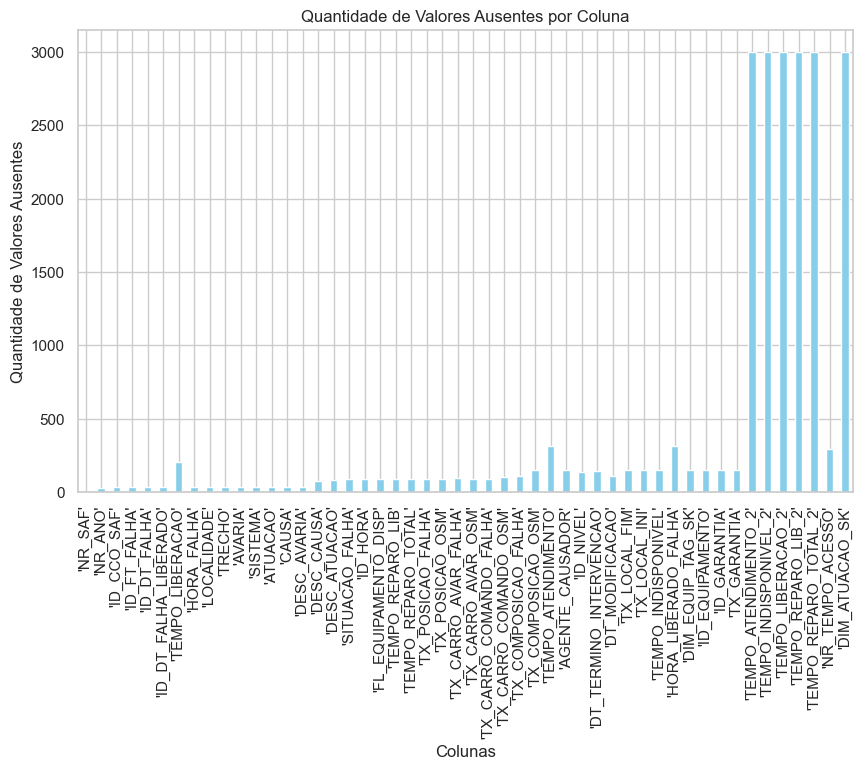

In [412]:
"""análise de valores ausentes na tabela por meio de um gráfico de barras"""
valores_ausentes = df.isnull().sum()

plt.figure(figsize=(10, 6))
valores_ausentes.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Valores Ausentes por Coluna')
plt.xlabel('Colunas')
plt.ylabel('Quantidade de Valores Ausentes')
plt.show()

## Limpeza dos dados

In [413]:
"""retirada das colunas que não possuem dados""" 
df = df.drop(["'DIM_ATUACAO_SK'", "'TEMPO_REPARO_TOTAL_2'", "'TEMPO_REPARO_LIB_2'", "'TEMPO_LIBERACAO_2'", "'TEMPO_INDISPONIVEL_2'", "'TEMPO_ATENDIMENTO_2'"], axis=1, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   'NR_SAF'                  3000 non-null   object 
 1   'NR_ANO'                  2972 non-null   object 
 2   'ID_CCO_SAF'              2967 non-null   object 
 3   'ID_FT_FALHA'             2967 non-null   object 
 4   'ID_DT_FALHA'             2967 non-null   object 
 5   'ID_DT_FALHA_LIBERADO'    2967 non-null   object 
 6   'TEMPO_LIBERACAO'         2796 non-null   object 
 7   'HORA_FALHA'              2967 non-null   object 
 8   'LOCALIDADE'              2967 non-null   object 
 9   'TRECHO'                  2967 non-null   object 
 10  'AVARIA'                  2967 non-null   object 
 11  'SISTEMA'                 2967 non-null   object 
 12  'ATUACAO'                 2967 non-null   object 
 13  'CAUSA'                   2967 non-null   object 
 14  'DESC_AV

In [414]:
"""retirada de linhas duplicadas"""
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   'NR_SAF'                  2998 non-null   object 
 1   'NR_ANO'                  2971 non-null   object 
 2   'ID_CCO_SAF'              2967 non-null   object 
 3   'ID_FT_FALHA'             2967 non-null   object 
 4   'ID_DT_FALHA'             2967 non-null   object 
 5   'ID_DT_FALHA_LIBERADO'    2967 non-null   object 
 6   'TEMPO_LIBERACAO'         2796 non-null   object 
 7   'HORA_FALHA'              2967 non-null   object 
 8   'LOCALIDADE'              2967 non-null   object 
 9   'TRECHO'                  2967 non-null   object 
 10  'AVARIA'                  2967 non-null   object 
 11  'SISTEMA'                 2967 non-null   object 
 12  'ATUACAO'                 2967 non-null   object 
 13  'CAUSA'                   2967 non-null   object 
 14  'DESC_AVARIA'

In [415]:
"""análise geral da tabela"""
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2998   │ │ string      │ 41    │                                                          │
│ │ Number of columns │ 44     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA   ┃ NA %  ┃ mean    ┃ sd      ┃ p0  ┃ p25    ┃ p50    ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ 'DIM_EQUIP_TAG_SK'    │  145 │  4.84 │   1.792 │   19.72 │   0 │      0 │      0 │     0 │    322 │   ▇    │  │
│ │ 'ID_EQUIPAMENTO'      │  145 │  4.84 │   67150 │   35860 │   0 │  66470 │  75260 │ 94430 │ 130500 │ ▃  ▇▅▁ │  │
│ │ 'ID_GARANTIA'         │  145 │  4.84 │  0.4956 │  0.8522 │   0 │      0 │      0 │     1 │      3 │ ▇   ▂  │  │
│ └───────────────────────┴──────┴───────┴─────────┴─────────┴─────┴────────┴────────┴───────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA      ┃ NA %       ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ 'NR_SAF'                            │       0 │          0 │                     1.1 │                3404 │  │
│ │ 'NR_ANO'                            │      27 │        0.9 │                     1.1 │                3325 │  │
│ │ 'ID_CCO_SAF'                        │      31 │       1.03 │                     1.2 │                3460 │  │
│ │ 'ID_FT_FALHA'                       │      31 │       1.03 │                    0.99 │                2968 │  │
│ │ 'ID_DT_FALHA'                       │      31 │       1.03 │                    0.99 │                2967 │  │
│ │ 'ID_DT_FALHA_LIBERADO'              │      31 │       1.03 │                    0.99 │                2967 │  │
│ │ 'TEMPO_LIBERACAO'                   │     202 │       6.74 │                    0.93 │                2796 │  │
│ │ 'HORA_FALHA'                        │      31 │       1.03 │                    0.99 │                2967 │  │
│ │ 'LOCALIDADE'                        │      31 │       1.03 │                       2 │                5877 │  │
│ │ 'TRECHO'                            │      31 │       1.03 │                       2 │                5877 │  │
│ │ 'AVARIA'                            │      31 │       1.03 │                     3.9 │               11697 │  │
│ │ 'SISTEMA'                           │      31 │       1.03 │                       2 │                5877 │  │
│ │ 'ATUACAO'                           │      31 │       1.03 │                       2 │                5877 │  │
│ │ 'CAUSA'                             │      31 │       1.03 │                       2 │                5877 │  │
│ │ 'DESC_AVARIA'                       │      31 │     

## Análise exploratória conclusiva

In [416]:
"""filtragem das colunas mais interessates e mais faceis de tirar conclusões e visualização delas"""

colunas_interessantes = df[["'CAUSA'", "'TRECHO'"]]
colunas_interessantes.head()

,'CAUSA','TRECHO'
0,'CAUSA 00792','TRECHO 00299'
1,'CAUSA 00733','TRECHO 00312'
2,'CAUSA 00000','TRECHO 00482'
3,'CAUSA 00000','TRECHO 00382'
4,'CAUSA 00645','TRECHO 00474'


In [417]:
""" 
Entendimento de padrões na coluna 'CAUSA' 
"""

frequencias = colunas_interessantes["'CAUSA'"].value_counts()
print(frequencias)

'CAUSA'
'CAUSA 00617'    350
'CAUSA 00850'    194
'CAUSA 00723'    186
'CAUSA 00616'    183
'CAUSA 00000'    168
                ... 
'CAUSA 00901'      1
'CAUSA 00880'      1
'B613'             1
'CAUSA 00735'      1
'CAUSA 00629'      1
Name: count, Length: 160, dtype: int64


In [418]:
""" 
Tratamento das colunas para deixar somente os numeros presentes nas linhas e trocando o tipo para Float
"""
colunas_interessantes["'CAUSA'"] = colunas_interessantes["'CAUSA'"].str.extract(r'(\d+)').astype(float)
colunas_interessantes["'TRECHO'"] = colunas_interessantes["'TRECHO'"].str.extract(r'(\d+)').astype(float)
colunas_interessantes.head()

C:\Users\Inteli\AppData\Local\Temp\ipykernel_23624\235960457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colunas_interessantes["'CAUSA'"] = colunas_interessantes["'CAUSA'"].str.extract(r'(\d+)').astype(float)
C:\Users\Inteli\AppData\Local\Temp\ipykernel_23624\235960457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colunas_interessantes["'TRECHO'"] = colunas_interessantes["'TRECHO'"].str.extract(r'(\d+)').astype(float)


,'CAUSA','TRECHO'
0,792.0,299.0
1,733.0,312.0
2,0.0,482.0
3,0.0,382.0
4,645.0,474.0


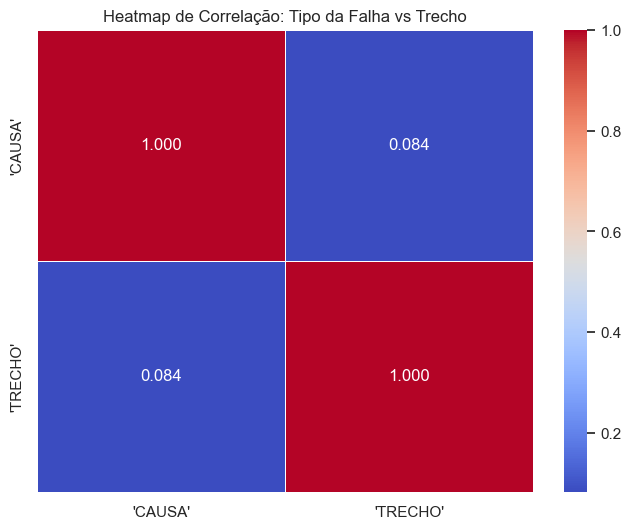

In [419]:
""" 
Matriz de correlação entre as colunas de ocorrencia e trecho - feito para entender se existe alta correlação entre
as falhas e os trechos.

"""
correlacao = colunas_interessantes[["'CAUSA'", "'TRECHO'"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Heatmap de Correlação: Tipo da Falha vs Trecho')
plt.show()

## Conclusão

### Descobertas

- **Descoberta 1**: A relação entre tipos especificos de falhas e trechos é muito baixa.
- **Descoberta 2**: A tabela possui muitas colunas com dados ausentes e com uma formatação não adequada.

### Hipótese 

É possível que não haja muitos trechos com falhas específicas recorrentes. Essa hipótese é sustentada pelo gráfico de correlação que foi elaborado.

## Exportação dos Dados

In [420]:
DATA_DIR = r'C:\Users\Inteli\Downloads\CPTM\dados_cptm'
csv_file = "tabela_big_data_ft_falhas.csv"

def salvar_df_como_parquet(df, file_name, data_dir):
    """
    Salva um DataFrame processado em formato Parquet.

    Args:
        df (pd.DataFrame): DataFrame com os dados processados a serem salvos.
        file_name (str): Nome do arquivo Parquet (sem extensão).
        data_dir (str): Diretório onde o arquivo Parquet será salvo.

    Returns:
        str: Caminho completo do arquivo Parquet salvo.
    """
    
    if not isinstance(df, pd.DataFrame):
        raise ValueError("O argumento 'df' deve ser um DataFrame do pandas.")
    
    if not isinstance(data_dir, str):
        raise ValueError("O argumento 'data_dir' deve ser uma string representando um diretório.")
    
    processed_data_dir = os.path.join(data_dir, 'processed')
    os.makedirs(processed_data_dir, exist_ok=True)

    parquet_path = os.path.join(processed_data_dir, f"{file_name}.parquet")

    try:
        df.to_parquet(parquet_path, index=False)
        print(f"Dados processados salvos em: {parquet_path}")
    except Exception as e:
        print(f"Ocorreu um erro ao salvar o DataFrame: {e}")
        return None

    return parquet_path

salvar_df_como_parquet(df, "falhas", DATA_DIR)

Dados processados salvos em: C:\Users\Inteli\Downloads\CPTM\dados_cptm\processed\falhas.parquet


'C:\\Users\\Inteli\\Downloads\\CPTM\\dados_cptm\\processed\\falhas.parquet'

In [421]:
load_dotenv()

aws_access_key = 
aws_secret_access_key = 
aws_session_token = 
aws_region_name = 

In [422]:
s3 = boto3.client('s3',
                  aws_access_key_id=,
                  aws_secret_access_key=,
                  aws_session_token=,
                  region_name= )

bucket_name = f"perola-negra"  

try:
    if aws_region_name == 'us-east-1':
        s3.create_bucket(Bucket=bucket_name)
    else:
        s3.create_bucket(Bucket=bucket_name,
                         CreateBucketConfiguration={'LocationConstraint': aws_region_name})
    
    print(f"Bucket '{bucket_name}' criado com sucesso.")
except s3.exceptions.BucketAlreadyOwnedByYou:
    print(f"Bucket '{bucket_name}' já existe e é de sua propriedade.")
except Exception as e:
    print(f"Erro ao criar bucket: {e}")

Bucket 'perola-negra' criado com sucesso.


In [423]:
def upload_arquivo_para_s3(parquet_file_name, bucket_name, subpasta, data_dir):
    """
    Faz o upload de um arquivo Parquet específico para uma subpasta em um bucket S3.

    Args:
        parquet_file_name (str): Nome do arquivo Parquet a ser enviado (sem extensão .parquet).
        bucket_name (str): Nome do bucket S3.
        subpasta (str): Nome da subpasta dentro do bucket S3.
        data_dir (str): Diretório local onde o arquivo Parquet está salvo.

    Returns:
        None
    """
    parquet_local = os.path.join(data_dir, f"{parquet_file_name}.parquet")

    s3_key = f"{subpasta}/{parquet_file_name}.parquet"

    try:
        # Enviar o arquivo para o bucket S3 na subpasta especificada
        s3.upload_file(parquet_local, bucket_name, s3_key)
        print(f"Arquivo '{parquet_local}' enviado para '{s3_key}' no bucket '{bucket_name}'.")
    except Exception as e:
        print(f"Erro ao enviar arquivo para S3: {e}")

PROCESSED_DATA_DIR = r'C:\Users\Inteli\Downloads\CPTM\dados_cptm\processed'


# Definir nome do bucket e subpasta
bucket_name = 'perola-negra'
subpasta = 'ocorrencias-falhas'
parquet_file_name = 'falhas'

upload_arquivo_para_s3(parquet_file_name, bucket_name, subpasta, PROCESSED_DATA_DIR)

Arquivo 'C:\Users\Inteli\Downloads\CPTM\dados_cptm\processed\falhas.parquet' enviado para 'ocorrencias-falhas/falhas.parquet' no bucket 'perola-negra'.
